In [5]:
import numpy as np 
from tabulate import tabulate
import pandas as pd 
from sklearn.cluster import KMeans
import random
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [6]:
#data cleaning and extracting relevant features
df1 = pd.read_csv("food_cleaned_data.csv")
df=df1[["cook","diet_current_coded","eating_out","sports","exercise","fav_cuisine_coded","on_off_campus","pay_meal_out","fav_food","fruit_day","income"]]
df.dropna(axis=0,inplace=True)
df.to_csv("food_choices.csv")
df

,cook,diet_current_coded,eating_out,sports,exercise,fav_cuisine_coded,on_off_campus,pay_meal_out,fav_food,fruit_day,income
0,2,1,3,1,1,3,1,2,1,5,5
1,3,2,2,1,1,1,1,4,1,4,4
2,1,3,2,2,2,1,2,3,3,5,6
3,2,2,2,2,3,3,1,2,1,4,6
4,1,2,2,1,1,1,1,4,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...
120,3,2,2,1,2,1,3,4,1,5,4
121,3,2,4,1,2,2,1,4,1,4,2
122,3,2,3,2,2,4,1,4,1,4,2
123,3,1,5,2,1,1,1,3,3,5,4


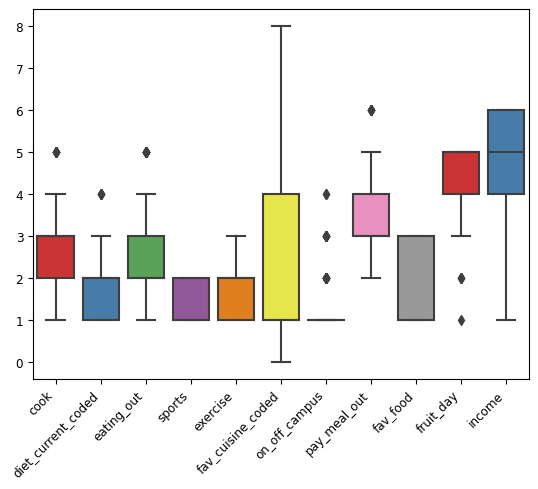

In [7]:
#Plotting Boxplot for cleaned data
sns.boxplot(data=df, palette="Set1").tick_params(labelsize=8.7)
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
#K-Means clustering on cleaned data
k = 3
kmeans = KMeans(n_clusters = k, random_state=0).fit(df)
df['Cluster']=kmeans.labels_

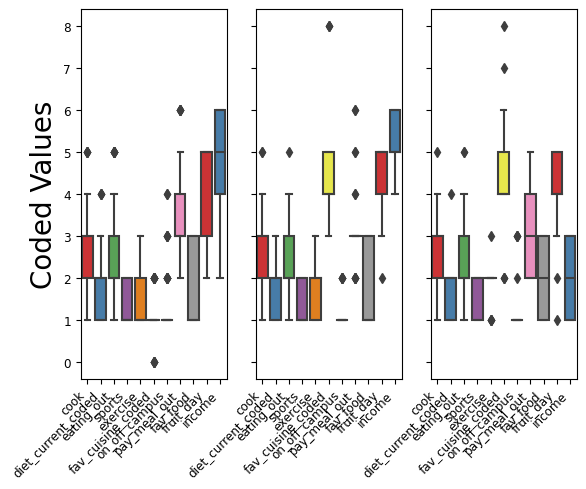

In [9]:
#Plotting Boxplot for optimal K value (K=3)
fig, axes = plt.subplots(1, k, sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=20)

for i in range(k):
     plt.sca(axes[i])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(palette="Set1",data = df[df['Cluster'] == i].drop('Cluster',1), ax=axes[i]).tick_params(labelsize=8.7)
        
plt.show()

KMeans(n_clusters=1, random_state=60)
KMeans(n_clusters=2, random_state=60)
KMeans(n_clusters=3, random_state=60)
KMeans(n_clusters=4, random_state=60)
KMeans(n_clusters=5, random_state=60)
KMeans(n_clusters=6, random_state=60)
KMeans(n_clusters=7, random_state=60)
KMeans(random_state=60)
KMeans(n_clusters=9, random_state=60)
KMeans(n_clusters=10, random_state=60)


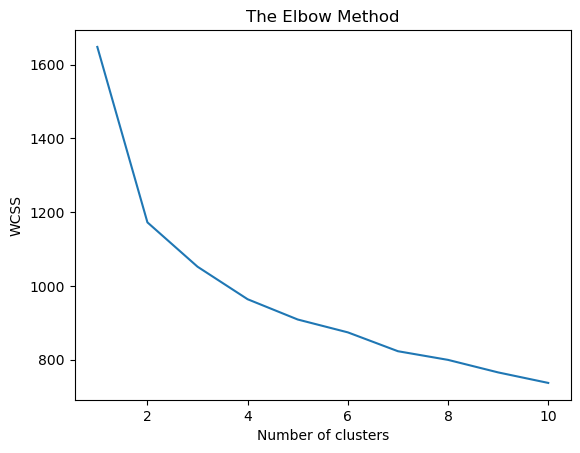

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 60)
    res = kmeans.fit(df)
    print(res)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()